In [1]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
from collections import Counter
from datetime import datetime
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# these three line import for Choropleth Maps
import plotly.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#set up everything so that the figures show up in the notebook
init_notebook_mode(connected=True) 


df1 = pd.DataFrame.from_csv('Carsharing/OPENDATA_BOOKING_CARSHARING.csv', index_col=None, sep=";")

df2 = pd.DataFrame.from_csv('Carsharing/OPENDATA_RENTAL_ZONE_CARSHARING.csv', index_col=None, sep=";")

In [2]:
#df1.head()

In [3]:
df2.head()

,RENTAL_ZONE_HAL_ID,RENTAL_ZONE_HAL_SRC,NAME,CODE,TYPE,CITY,COUNTRY,LATITUDE,LONGITUDE,POI_AIRPORT_X,POI_LONG_DISTANCE_TRAINS_X,POI_SUBURBAN_TRAINS_X,POI_UNDERGROUND_X,ACTIVE_X,COMPANY,COMPANY_GROUP
0,38,Station,Paul-Lincke-Ufer,PLU,parkingarea,Berlin,Deutschland,"52,491966685810670","13,437334746122360",Nein,Nein,Nein,Nein,Nein,Flinkster (Endkd.),DB Fuhrpark
1,79,Station,Ostbahnhof,OST,stationbased,Berlin,Deutschland,"52,509446616791216","13,433682918548584",Nein,Ja,Nein,Nein,Ja,Flinkster (Endkd.),DB Fuhrpark
2,136,Station,Hbf Rostock,Hbf Rostock,stationbased,Rostock,Deutschland,"54,077917752559770","12,132610380649567",Nein,Ja,Ja,Nein,Ja,Flinkster (Endkd.),DB Fuhrpark
3,138,Station,Hbf Schwerin,Hbf Schwerin,parkingarea,Schwerin,Deutschland,"53,633873801997470","11,406887769699097",Nein,Ja,Nein,Nein,Ja,Flinkster (Endkd.),DB Fuhrpark
4,171,Station,Hbf Aschaffenburg,Hbf Aschaffenburg,stationbased,Aschaffenburg,Deutschland,"49,981667892009890","9,144830703735351",Nein,Ja,Nein,Nein,Ja,Flinkster (Endkd.),DB Fuhrpark


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 16 columns):
RENTAL_ZONE_HAL_ID            628 non-null int64
RENTAL_ZONE_HAL_SRC           628 non-null object
NAME                          628 non-null object
CODE                          628 non-null object
TYPE                          628 non-null object
CITY                          628 non-null object
COUNTRY                       628 non-null object
LATITUDE                      616 non-null object
LONGITUDE                     616 non-null object
POI_AIRPORT_X                 628 non-null object
POI_LONG_DISTANCE_TRAINS_X    628 non-null object
POI_SUBURBAN_TRAINS_X         628 non-null object
POI_UNDERGROUND_X             628 non-null object
ACTIVE_X                      628 non-null object
COMPANY                       628 non-null object
COMPANY_GROUP                 628 non-null object
dtypes: int64(1), object(15)
memory usage: 78.6+ KB


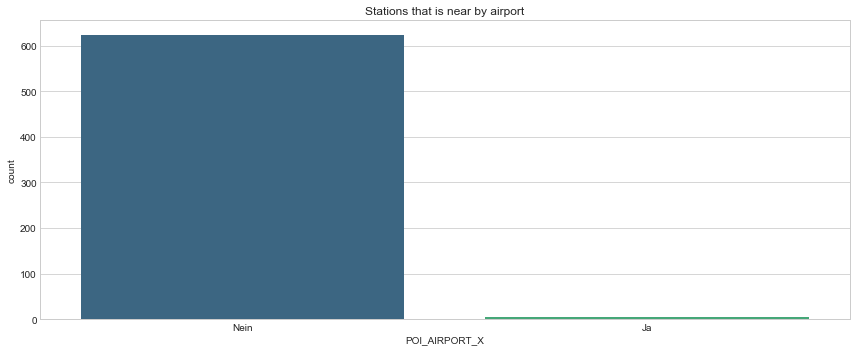

In [5]:
plt.figure(figsize=(12,5))
sns.countplot(x='POI_AIRPORT_X', data = df2, palette='viridis')
plt.title('Stations that is near by airport')
plt.tight_layout()

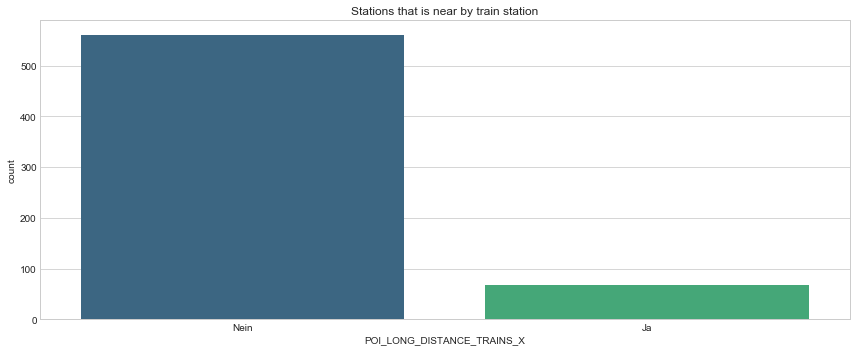

In [6]:
plt.figure(figsize=(12,5))
sns.countplot(x='POI_LONG_DISTANCE_TRAINS_X', data = df2, palette='viridis')
plt.title('Stations that is near by train station')
plt.tight_layout()

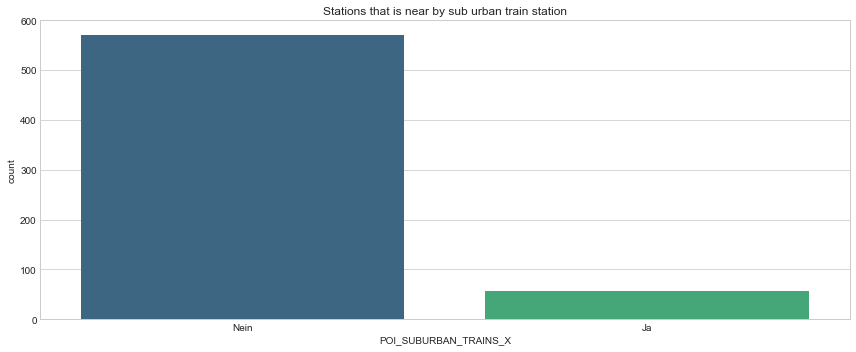

In [7]:
plt.figure(figsize=(12,5))
sns.countplot(x='POI_SUBURBAN_TRAINS_X', data = df2, palette='viridis')
plt.title('Stations that is near by sub urban train station')
plt.tight_layout()

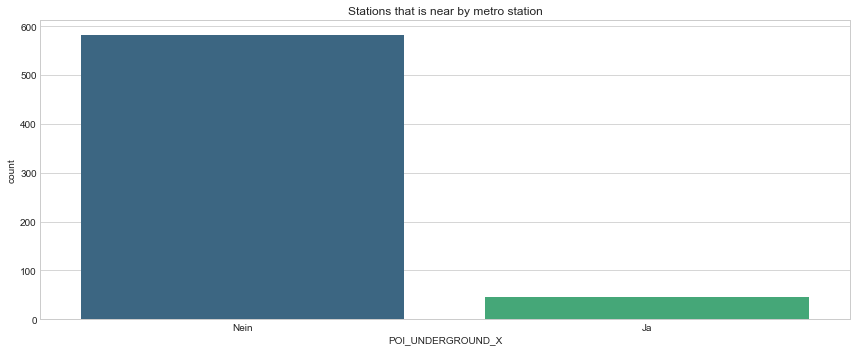

In [8]:
plt.figure(figsize=(12,5))
sns.countplot(x='POI_UNDERGROUND_X', data = df2, palette='viridis')
plt.title('Stations that is near by metro station')
plt.tight_layout()

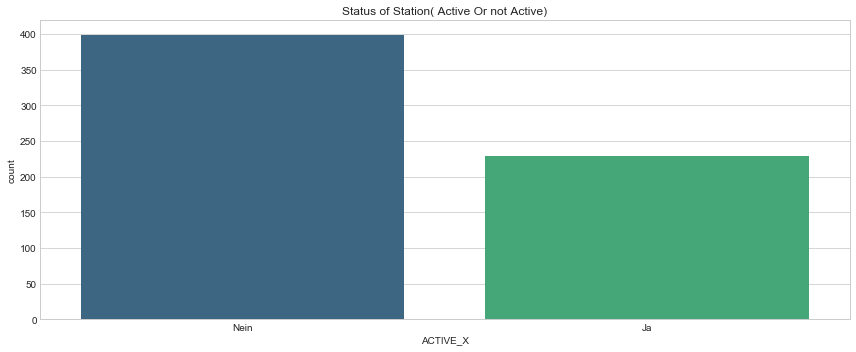

In [9]:
plt.figure(figsize=(12,5))
sns.countplot(x='ACTIVE_X', data = df2, palette='viridis')
plt.title('Status of Station( Active Or not Active)')
plt.tight_layout()

In [10]:
df2['RENTAL_ZONE_HAL_SRC'].value_counts()

Station    628
Name: RENTAL_ZONE_HAL_SRC, dtype: int64

In [11]:
df2['TYPE'].value_counts()

stationbased    535
parkingarea      92
freefloating      1
Name: TYPE, dtype: int64

In [12]:
df2['POI_AIRPORT_X'].value_counts()

Nein    624
Ja        4
Name: POI_AIRPORT_X, dtype: int64

In [13]:
df2['POI_LONG_DISTANCE_TRAINS_X'].value_counts()

Nein    561
Ja       67
Name: POI_LONG_DISTANCE_TRAINS_X, dtype: int64

In [14]:
df2['POI_SUBURBAN_TRAINS_X'].value_counts()

Nein    571
Ja       57
Name: POI_SUBURBAN_TRAINS_X, dtype: int64

In [15]:
df2['POI_UNDERGROUND_X'].value_counts()

Nein    583
Ja       45
Name: POI_UNDERGROUND_X, dtype: int64

In [16]:
df2['ACTIVE_X'].value_counts()

Nein    399
Ja      229
Name: ACTIVE_X, dtype: int64

In [17]:
df2['RENTAL_ZONE_HAL_SRC'].value_counts()

Station    628
Name: RENTAL_ZONE_HAL_SRC, dtype: int64

In [18]:
df2['TYPE']=df2['TYPE'].map({'stationbased' : 1, 'parkingarea' :2,'freefloating' :3}).astype(int)

In [19]:
df2['POI_AIRPORT_X']=df2['POI_AIRPORT_X'].map({'Nein' : 0, 'Ja' :1}).astype(int)

In [20]:
df2['POI_LONG_DISTANCE_TRAINS_X']=df2['POI_LONG_DISTANCE_TRAINS_X'].map({'Nein' : 0, 'Ja' :1}).astype(int)

In [21]:
df2['POI_SUBURBAN_TRAINS_X']=df2['POI_SUBURBAN_TRAINS_X'].map({'Nein' : 0, 'Ja' :1}).astype(int)

In [22]:
df2['POI_UNDERGROUND_X']=df2['POI_UNDERGROUND_X'].map({'Nein' : 0, 'Ja' :1}).astype(int)

In [23]:
#df2['ACTIVE_X']=df2['ACTIVE_X'].map({'Nein' : 0, 'Ja' :1}).astype(int)

In [24]:
df2['RENTAL_ZONE_HAL_SRC']=df2['RENTAL_ZONE_HAL_SRC'].map({'Station' : 1}).astype(int)

In [25]:
df2['COUNTRY']=df2['COUNTRY'].map({'Deutschland' : 1}).astype(int)

In [26]:
df2['COMPANY']=df2['COMPANY'].map({'Flinkster (Endkd.)' : 1}).astype(float)

In [27]:
df2['COMPANY_GROUP']=df2['COMPANY_GROUP'].map({'DB Fuhrpark' : 1}).astype(float)

In [28]:
df2['LATITUDE'] = df2['LATITUDE'].str.replace(',', '.')
df2['LATITUDE'] = df2['LATITUDE'].astype(float)

In [29]:
df2['LONGITUDE'] = df2['LONGITUDE'].str.replace(',', '.')
df2['LONGITUDE'] = df2['LONGITUDE'].astype(float)

In [30]:
df2.drop(['LATITUDE'], axis = 1, inplace = True)

In [31]:
df2.drop(['LONGITUDE'], axis = 1, inplace = True)

In [32]:
df2.drop(['CITY'], axis = 1, inplace = True)

In [33]:
df2.drop(['CODE'], axis = 1, inplace = True)

In [34]:
df2.drop(['NAME'], axis = 1, inplace = True)

In [35]:
df2.drop(['RENTAL_ZONE_HAL_ID','RENTAL_ZONE_HAL_SRC','COUNTRY','COMPANY','COMPANY_GROUP'], axis = 1, inplace = True)

In [36]:
df2.tail()

,TYPE,POI_AIRPORT_X,POI_LONG_DISTANCE_TRAINS_X,POI_SUBURBAN_TRAINS_X,POI_UNDERGROUND_X,ACTIVE_X
623,2,0,0,0,0,Ja
624,2,0,0,0,0,Ja
625,1,0,0,0,0,Ja
626,2,0,0,0,0,Ja
627,1,0,0,0,0,Ja


In [37]:
df2.dtypes

TYPE                           int32
POI_AIRPORT_X                  int32
POI_LONG_DISTANCE_TRAINS_X     int32
POI_SUBURBAN_TRAINS_X          int32
POI_UNDERGROUND_X              int32
ACTIVE_X                      object
dtype: object

In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628 entries, 0 to 627
Data columns (total 6 columns):
TYPE                          628 non-null int32
POI_AIRPORT_X                 628 non-null int32
POI_LONG_DISTANCE_TRAINS_X    628 non-null int32
POI_SUBURBAN_TRAINS_X         628 non-null int32
POI_UNDERGROUND_X             628 non-null int32
ACTIVE_X                      628 non-null object
dtypes: int32(5), object(1)
memory usage: 17.2+ KB


In [39]:
df2.isnull().any()

TYPE                          False
POI_AIRPORT_X                 False
POI_LONG_DISTANCE_TRAINS_X    False
POI_SUBURBAN_TRAINS_X         False
POI_UNDERGROUND_X             False
ACTIVE_X                      False
dtype: bool

In [40]:
#sns.pairplot(df2,hue='ACTIVE_X',palette='Set1')

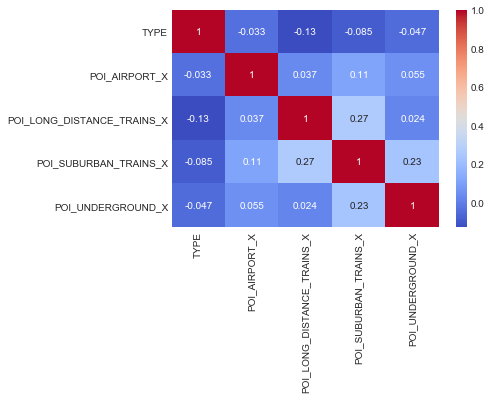

In [41]:
sns.heatmap(df2.corr(),cmap='coolwarm',annot=True)

In [42]:
# from sklearn.cross_validation import train_test_split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X = df2.drop('ACTIVE_X',axis=1)
y = df2['ACTIVE_X']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=400)

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dtree = DecisionTreeClassifier()

In [48]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Decision Tree Classifier

In [49]:
predictions = dtree.predict(X_test)

In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [51]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

         Ja       0.81      0.54      0.65        65
       Nein       0.79      0.94      0.86       124

avg / total       0.80      0.80      0.79       189



In [52]:
print(confusion_matrix(y_test,predictions))

[[ 35  30]
 [  8 116]]


In [53]:
 import sklearn.metrics


In [54]:
print(sklearn.metrics.accuracy_score(y_test, predictions))

0.798941798942


# Random Forests Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rfc = RandomForestClassifier(n_estimators=400)

In [57]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [58]:
rfc_predictions = rfc.predict(X_test)

In [59]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
print(classification_report(y_test,rfc_predictions))

             precision    recall  f1-score   support

         Ja       0.81      0.54      0.65        65
       Nein       0.79      0.94      0.86       124

avg / total       0.80      0.80      0.79       189



In [61]:
print(confusion_matrix(y_test,rfc_predictions))

[[ 35  30]
 [  8 116]]


In [62]:
print(sklearn.metrics.accuracy_score(y_test, rfc_predictions))

0.798941798942
